In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [3]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
inputs=df.drop(['Car_Name','Owner','Selling_type'],axis='columns')
target=df.Selling_Price
inputs

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Manual
1,2013,4.75,9.54,43000,Diesel,Manual
2,2017,7.25,9.85,6900,Petrol,Manual
3,2011,2.85,4.15,5200,Petrol,Manual
4,2014,4.60,6.87,42450,Diesel,Manual
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual
297,2015,4.00,5.90,60000,Petrol,Manual
298,2009,3.35,11.00,87934,Petrol,Manual
299,2017,11.50,12.50,9000,Diesel,Manual


In [11]:
from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()

In [13]:
inputs['fuel_n']=Numerics.fit_transform(inputs['Fuel_Type'])
inputs['transmission_n']=Numerics.fit_transform(inputs['Transmission'])
inputs

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,fuel_n,transmission_n
0,2014,3.35,5.59,27000,Petrol,Manual,2,1
1,2013,4.75,9.54,43000,Diesel,Manual,1,1
2,2017,7.25,9.85,6900,Petrol,Manual,2,1
3,2011,2.85,4.15,5200,Petrol,Manual,2,1
4,2014,4.60,6.87,42450,Diesel,Manual,1,1
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual,1,1
297,2015,4.00,5.90,60000,Petrol,Manual,2,1
298,2009,3.35,11.00,87934,Petrol,Manual,2,1
299,2017,11.50,12.50,9000,Diesel,Manual,1,1


In [14]:
inputs_n=inputs.drop(['Fuel_Type','Transmission','Selling_Price'],axis='columns')
inputs_n

,Year,Present_Price,Driven_kms,fuel_n,transmission_n
0,2014,5.59,27000,2,1
1,2013,9.54,43000,1,1
2,2017,9.85,6900,2,1
3,2011,4.15,5200,2,1
4,2014,6.87,42450,1,1
...,...,...,...,...,...
296,2016,11.60,33988,1,1
297,2015,5.90,60000,2,1
298,2009,11.00,87934,2,1
299,2017,12.50,9000,1,1


In [16]:
model=linear_model.LinearRegression()

In [17]:
model.fit(inputs_n,target)

LinearRegression()

In [29]:
pred = model.predict([[2013,9.54, 43000, 1, 1]])
print(pred)

[6.43053161]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [31]:
import matplotlib.pyplot as plt

In [32]:
training_data_prediction=model.predict(inputs_n)

In [33]:
from sklearn import metrics

In [34]:
error_score=metrics.r2_score(target,training_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8688814828622952


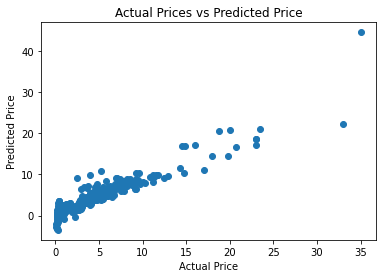

In [35]:
plt.scatter(target,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()